In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import defaultdict
from glob import glob
from skimage import io, transform
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ENGI 4800/data/author-capstone-20K-limit.csv', sep = '|', header = None)

df.columns = ["pii", "Section_title", "Section_content", "Authors"]

In [ ]:
import json
df_1 = df.dropna().drop(columns=["Section_title"])
df_1.head(5)

,pii,Section_content,Authors
2,S0001457520316912,"Qinghong Chen: Conceptualization, Data - proce...","[{\Authorseq\"":1,\""auid\"":57221096756,\""given_..."
3,S000145752031770X,The authors confirm contribution to the paper ...,"[{\Authorseq\"":1,\""auid\"":57221288000,\""given_..."
4,S0001457521002001,The authors confirm contribution to the paper ...,"[{\Authorseq\"":1,\""auid\"":57208572807,\""given_..."
6,S0001706X21001960,"Jacques D Charlwood designed the study, establ...","[{\Authorseq\"":1,\""auid\"":7006426873,\""given_n..."
9,S0002914920301132,"Conceptualization: KG, NSB; Data curation: KG,...","[{\Authorseq\"":1,\""auid\"":57198261180,\""given_..."


In [ ]:
import json
import nltk
import re

nltk.download('punkt')
df_copy = df_1.copy()
df_authors = None
authors_count = []
sentences_count = []
splitted_texts = []
for index,row in df_copy.iterrows():
   # build authors table 
    authors = row[2]
    authors = authors.replace("[{\\", "\"[{\\\"")
    y = json.loads(authors)
    df_tmp = pd.read_json(y, orient ='records')
#     df_tmp.loc[:,'pii'] = row[0]
    df_tmp.insert(0,'pii', row[0])
    
    # add paragraph count 
    paragraph = row[1]
    replaced_txt = re.sub(r"([^A-Z])([.|;]\s+)", r"\1\n", paragraph)
    splitted_txt = re.split(r"\n", replaced_txt)
    
    sentences_count.append(len(splitted_txt)) 
    splitted_texts.append(splitted_txt)

    
    # add authors count 
    authors_count.append(len(df_tmp.index)) 
    
    if df_authors is None:
        df_authors = df_tmp
    else:
        df_authors = pd.concat([df_authors, df_tmp], ignore_index=True)

df_copy.insert(1,'authors_count', authors_count)
df_copy.insert(1,'sentences_count', sentences_count)
df_copy.insert(4,'splitted_txt', splitted_texts)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df_copy.head(5)

,pii,sentences_count,authors_count,Section_content,splitted_txt,Authors
2,S0001457520316912,6,6,"Qinghong Chen: Conceptualization, Data - proce...","[Qinghong Chen: Conceptualization, Data - proc...","[{\Authorseq\"":1,\""auid\"":57221096756,\""given_..."
3,S000145752031770X,5,4,The authors confirm contribution to the paper ...,[The authors confirm contribution to the paper...,"[{\Authorseq\"":1,\""auid\"":57221288000,\""given_..."
4,S0001457521002001,5,2,The authors confirm contribution to the paper ...,[The authors confirm contribution to the paper...,"[{\Authorseq\"":1,\""auid\"":57208572807,\""given_..."
6,S0001706X21001960,1,7,"Jacques D Charlwood designed the study, establ...","[Jacques D Charlwood designed the study, estab...","[{\Authorseq\"":1,\""auid\"":7006426873,\""given_n..."
9,S0002914920301132,1,9,"Conceptualization: KG, NSB; Data curation: KG,...","[Conceptualization: KG, NSB; Data curation: KG...","[{\Authorseq\"":1,\""auid\"":57198261180,\""given_..."


## Count of authors and sentences

In [ ]:
df_copy['diff_count'] = abs(df_copy['authors_count'] - df_copy['sentences_count'])

In [ ]:
df_copy

,pii,sentences_count,authors_count,Section_content,splitted_txt,Authors,diff_count
2,S0001457520316912,6,6,"Qinghong Chen: Conceptualization, Data - proce...","[Qinghong Chen: Conceptualization, Data - proc...","[{\Authorseq\"":1,\""auid\"":57221096756,\""given_...",0
3,S000145752031770X,5,4,The authors confirm contribution to the paper ...,[The authors confirm contribution to the paper...,"[{\Authorseq\"":1,\""auid\"":57221288000,\""given_...",1
4,S0001457521002001,5,2,The authors confirm contribution to the paper ...,[The authors confirm contribution to the paper...,"[{\Authorseq\"":1,\""auid\"":57208572807,\""given_...",3
6,S0001706X21001960,1,7,"Jacques D Charlwood designed the study, establ...","[Jacques D Charlwood designed the study, estab...","[{\Authorseq\"":1,\""auid\"":7006426873,\""given_n...",6
9,S0002914920301132,1,9,"Conceptualization: KG, NSB; Data curation: KG,...","[Conceptualization: KG, NSB; Data curation: KG...","[{\Authorseq\"":1,\""auid\"":57198261180,\""given_...",8
...,...,...,...,...,...,...,...
19995,S0024320519309415,3,6,"Y.Z. conceived the work, designed and performe...","[Y.Z. conceived the work, designed and perform...","[{\Authorseq\"":1,\""auid\"":57196239544,\""given_...",3
19996,S0024320520305774,1,5,"Emily Durham: Conceptualization, Methodology, ...","[Emily Durham: Conceptualization, Methodology,...","[{\Authorseq\"":1,\""auid\"":36875917900,\""given_...",4
19997,S0024320520305853,1,3,"Junling Lin: Major performer, LeaderXiaokai Fe...","[Junling Lin: Major performer, LeaderXiaokai F...","[{\Authorseq\"":1,\""auid\"":57209316649,\""given_...",2
19998,S0024320520309747,6,6,"C.Z. performed the experiments; C.Z., Y.Q., an...","[C.Z. performed the experiments, C.Z., Y.Q., a...","[{\Authorseq\"":1,\""auid\"":57218442730,\""given_...",0


In [ ]:
df_copy.describe()

,sentences_count,authors_count,diff_count
count,16949.000000,16949.000000,16949.000000
mean,5.282967,7.871261,4.194879
std,4.010628,22.410337,22.243104
min,1.000000,1.000000,0.000000
25%,3.000000,4.000000,1.000000
50%,5.000000,6.000000,3.000000
75%,7.000000,9.000000,5.000000
max,74.000000,2622.000000,2615.000000


In [ ]:
df_copy.quantile(.9999, axis = 0)

sentences_count     66.3052
authors_count      575.0596
diff_count         569.2284
Name: 0.9999, dtype: float64

99.99% authors count less than 46, so we try to remove the 0.01% outliers

In [ ]:
#remove author count >= 100

df_author_sentence_cleaned = df_copy[df_copy['authors_count']<=100]

df_author_sentence_cleaned = df_copy[df_copy.sentences_count!=1]

#remove sentence count = 1 

In [ ]:
df_author_sentence_cleaned

,pii,sentences_count,authors_count,Section_content,splitted_txt,Authors,diff_count
2,S0001457520316912,6,6,"Qinghong Chen: Conceptualization, Data - proce...","[Qinghong Chen: Conceptualization, Data - proc...","[{\Authorseq\"":1,\""auid\"":57221096756,\""given_...",0
3,S000145752031770X,5,4,The authors confirm contribution to the paper ...,[The authors confirm contribution to the paper...,"[{\Authorseq\"":1,\""auid\"":57221288000,\""given_...",1
4,S0001457521002001,5,2,The authors confirm contribution to the paper ...,[The authors confirm contribution to the paper...,"[{\Authorseq\"":1,\""auid\"":57208572807,\""given_...",3
10,S0002914920306883,7,8,"Waqas Ullah, MD: Conceptualization; Roles/Writ...","[Waqas Ullah, MD: Conceptualization, Roles/Wri...","[{\Authorseq\"":1,\""auid\"":57189385591,\""given_...",1
11,S0002914920308997,14,5,"Conceptualization, V.K., M.M and J.G.; methodo...","[Conceptualization, V.K., M.M and J.G., method...","[{\Authorseq\"":1,\""auid\"":9638921000,\""given_n...",9
...,...,...,...,...,...,...,...
19990,S0024320518306714,6,9,"Franciane Quintanilha Gallego, Yuri Karen Sinz...","[Franciane Quintanilha Gallego, Yuri Karen Sin...","[{\Authorseq\"":1,\""auid\"":54392360500,\""given_...",3
19992,S0024320519308197,5,18,"Chun Zhang, Kai Fan, Xiaowei Shi and Zhilong Z...","[Chun Zhang, Kai Fan, Xiaowei Shi and Zhilong ...","[{\Authorseq\"":1,\""auid\"":57195317991,\""given_...",13
19995,S0024320519309415,3,6,"Y.Z. conceived the work, designed and performe...","[Y.Z. conceived the work, designed and perform...","[{\Authorseq\"":1,\""auid\"":57196239544,\""given_...",3
19998,S0024320520309747,6,6,"C.Z. performed the experiments; C.Z., Y.Q., an...","[C.Z. performed the experiments, C.Z., Y.Q., a...","[{\Authorseq\"":1,\""auid\"":57218442730,\""given_...",0


In [ ]:
df_author_sentence_cleaned.describe()

,sentences_count,authors_count,diff_count
count,14497.000000,14497.000000,14497.000000
mean,6.007381,8.079741,3.950679
std,3.895930,24.130060,23.946134
min,2.000000,1.000000,0.000000
25%,4.000000,4.000000,1.000000
50%,5.000000,6.000000,2.000000
75%,7.000000,9.000000,5.000000
max,74.000000,2622.000000,2615.000000


number of sentences are not exactly the same with authors

### Distribution of Count

[Text(0.5, 1.0, 'Distribution of author count')]

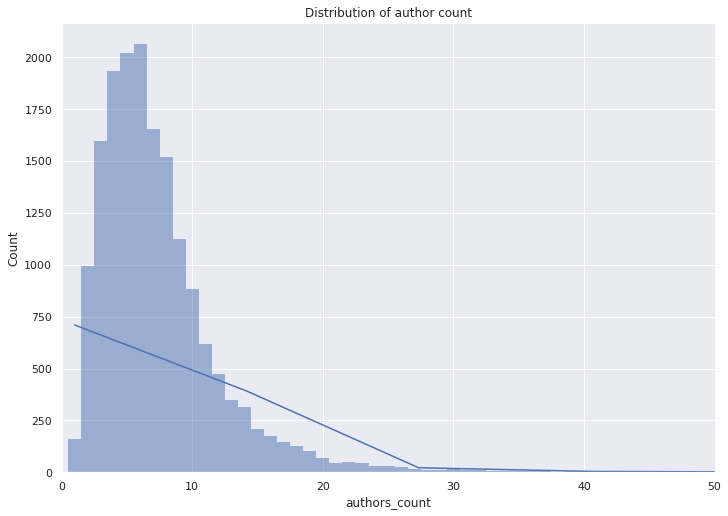

In [ ]:
authorC=sns.histplot(data=df_copy, x="authors_count",kde=True,discrete = True)
authorC.set(xlim=(0,50)) #99.99% of data< 46
authorC.set(title='Distribution of author count')

[Text(0.5, 1.0, 'Distribution of sentences count')]

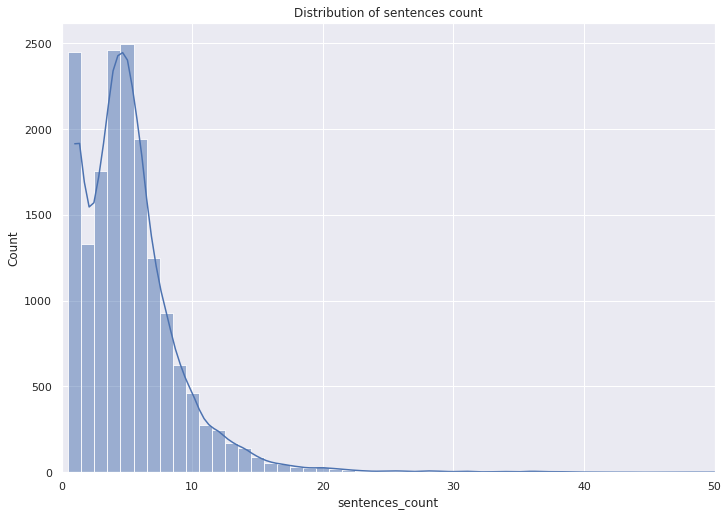

In [ ]:
sentenseC=sns.histplot(data=df_copy, x="sentences_count",kde=True,discrete = True,binwidth=1)
sentenseC.set(xlim=(0,50))
sentenseC.set(title='Distribution of sentences count')

[Text(0.5, 1.0, 'Distribution of sentences count(remove count = 1)')]

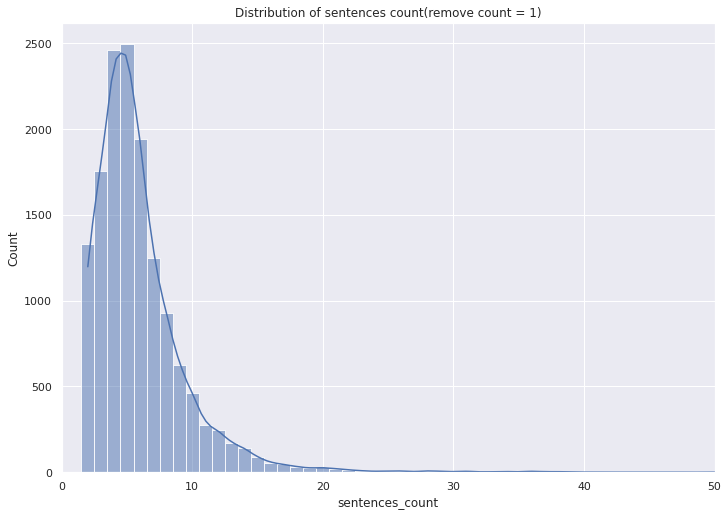

In [ ]:
sentense_after=sns.histplot(data=df_author_sentence_cleaned, x="sentences_count",kde=True,discrete = True,binwidth=1)
sentense_after.set(xlim=(0,50))
sentense_after.set(title='Distribution of sentences count(remove count = 1)')

many have only 1 sentence
-reason: some use ';' instead of ',' as seperator 


In [ ]:
import matplotlib.ticker as ticker

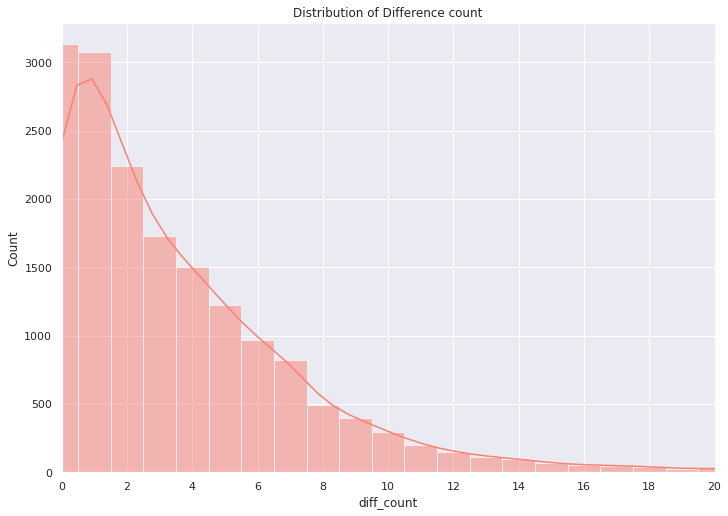

In [ ]:
diffC=sns.histplot(data=df_copy, x="diff_count",kde=True,discrete = True,color='salmon')
diffC.set(xlim=(0,20))
diffC.set(title='Distribution of Difference count')
diffC.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

Most are the same or similar with authors count

## Authors for each paper

In [ ]:
df_authors

,pii,Authorseq,auid,given_name_pn,surname_pn,initials_pn
0,S0001457520316912,1,5.722110e+10,Qinghong,Chen,Q.
1,S0001457520316912,2,5.722110e+10,Ruifeng,Gu,R.
2,S0001457520316912,3,1.584158e+10,Helai,Huang,H.
3,S0001457520316912,4,5.559948e+10,Jaeyoung,Lee,J.
4,S0001457520316912,5,5.718925e+10,Xiaoqi,Zhai,X.
...,...,...,...,...,...,...
133405,S0024320520317380,2,5.720377e+10,Hyun Soo,Park,H.S.
133406,S0024320520317380,3,5.719506e+10,Do Hyung,Lee,D.H.
133407,S0024320520317380,4,5.722131e+10,Jun Hwan,Jo,J.H.
133408,S0024320520317380,5,7.004359e+09,Kyung Sun,Heo,K.S.
